# Task 1 (Canada Per Capita)
The Dataset from kaggle (https://www.kaggle.com/datasets/gurdit559/canada-per-capita-income-single-variable-data-set?resource=download&select=canada_per_capita_income.csv)

## Import Libraries

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

## Load Data

In [7]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


## Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


From the info displayed, The data is in the right format (Data types) and there is no nans.
So data doesn't need any cleaning

In [11]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


## Check Duplicates

In [13]:
df[df.duplicated()]

,year,per capita income (US$)


## Data Visualization 

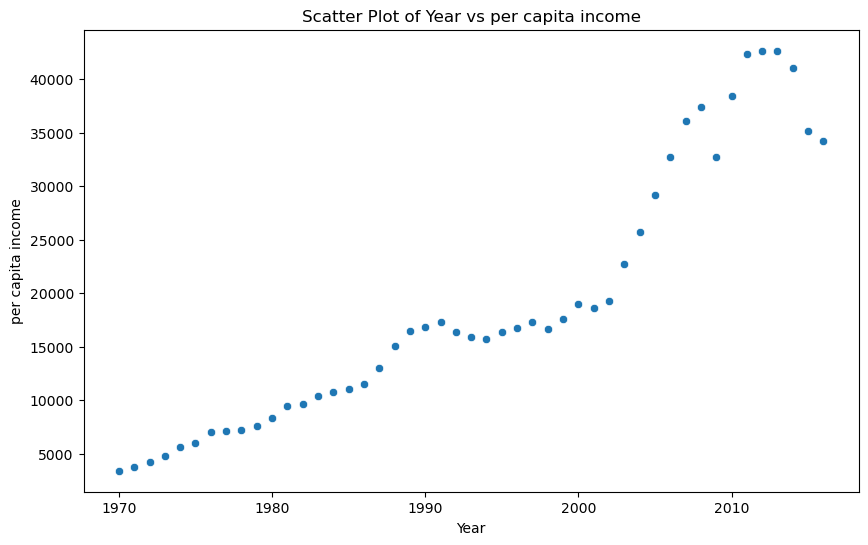

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='per capita income (US$)')
plt.title('Scatter Plot of Year vs per capita income')
plt.xlabel('Year')
plt.ylabel('per capita income')
plt.show()

This visualization shows that the data can be formed as a linear line, So the best way for it is the linear regression

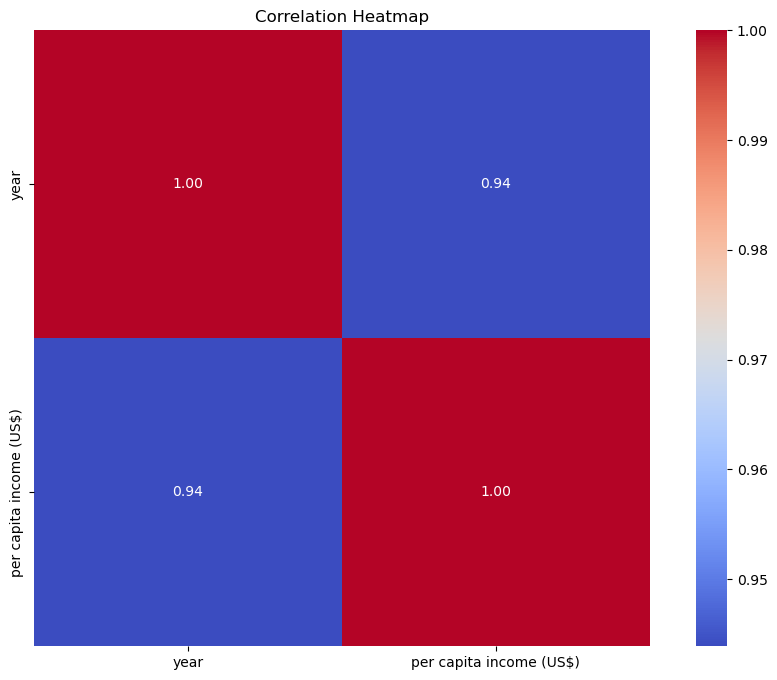

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

This Heatmap shows the corrolation between the columns of the dataset, And what i got is the corrolation between years and the capita income is highly positive as (The higher yea, The more income).

## Split Features and Targets

In [20]:
X = df.drop('per capita income (US$)', axis=1)  
y = df['per capita income (US$)']

## Split Train and Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Linear Regression Model

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
print("This is the predicted Values\n" , y_pred)
print("This is the Actual Values\n" , y_test)

This is the predicted Values
 [22126.36537343 31970.12186981 21306.05233206 35251.37403527
 19665.42624933 29509.18274571  9821.66975295 15563.86104251
  3259.16542203 20485.7392907   6540.41758749  2438.85238067
  4899.79150476 32790.43491117 27048.24362162]
This is the Actual Values
 27    17310.757750
39    32755.176820
26    16699.826680
43    42676.468370
24    15755.820270
36    32738.262900
12     9619.438377
19    16426.725480
4      5576.514583
25    16369.317250
8      7247.967035
3      4804.463248
6      7062.131392
40    38420.522890
33    22739.426280
Name: per capita income (US$), dtype: float64


## Error Calculation

In [29]:
mean_squared_error(y_test, y_pred)

14000295.245757796

In [30]:
mean_absolute_error(y_test, y_pred)

3162.9294154442787

## Accuracy Calculation

In [32]:
r2_score(y_test, y_pred)

0.9005705995581696

## Linear Regression Visualization

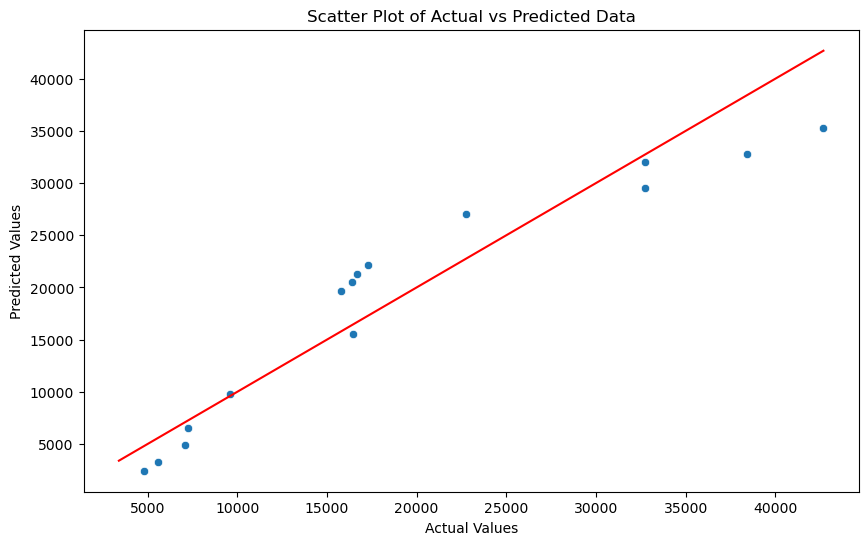

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r') 
plt.title('Scatter Plot of Actual vs Predicted Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

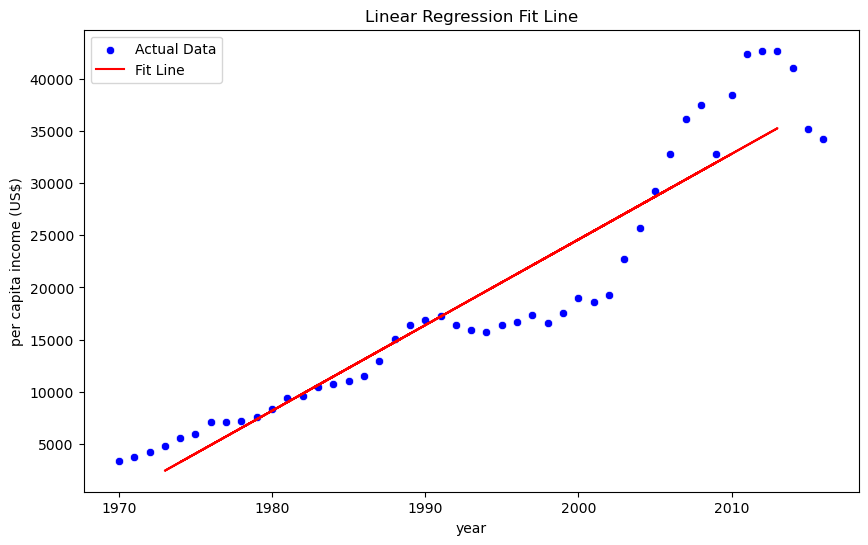

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['year'], y=y, label='Actual Data', color='blue')

plt.plot(X_test, y_pred, color='red', label='Fit Line')
plt.title('Linear Regression Fit Line')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.legend()
plt.show()

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=2020.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.